In [1]:
import pandas as pd
import numpy as np
import random
import altair as alt
alt.renderers.enable('notebook')
import matplotlib.pyplot as plt

from scipy import optimize
from scipy.stats import expon

import math

import time
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import seaborn as sns

import p_limites
import agentes
import market_v2
import esb

### Parâmetros da função market

- jogadores: quantidade de jogadores, distribuidos igualmente entre vendedores e compradores
- co: quantidade de preços limites que cada agente tem disponível
- per: quantidade de subperíodos
- paper_values: utiliza os preços limites do artigo $\textit{Price Formation in Double Auctions}$. Neste caso, jogadores= 8 e co=3.
- memo: memória de cada agente dos últimos $n$ negócios realizados.
- FP_DP_TD: algoritmo será utilizado no comportamento dos agentes.
    - = 0: Fictitious Play
    - = 1: Programação Dinâmica
    - = 3: Q-Learning

- inf: menor valor dos preços limites. 
- sup: maior valor dos preços limites.
- acoes: quantidade de ações permitidas no intervalo \[inf,sup\]

In [3]:
jogadores=10
quantidade=5
per=10
memo=20
agente='Q'
inf=0
sup=100
acoes=100
distribuicao='normal'
media=50
dp=5
alfa=0.95
gamma=0.9

lista_agentes=agentes.define_agentes(jogadores,quantidade,per,memo,agente,inf,sup,acoes,distribuicao,media,dp,alfa,gamma)

Valores Limites

vazio   0 : [42, 45, 49, 58, 61]
vendedor   1 : [46, 50, 52, 53, 56]
vendedor   2 : [45, 49, 51, 56, 58]
vendedor   3 : [49, 53, 57, 57, 64]
vendedor   4 : [45, 50, 52, 54, 58]
vendedor   5 : [44, 46, 47, 50, 53]
comprador   6 : [54, 53, 50, 47, 44]
comprador   7 : [52, 51, 51, 50, 44]
comprador   8 : [61, 54, 50, 48, 47]
comprador   9 : [56, 49, 45, 43, 40]
comprador   10 : [58, 57, 52, 52, 45]


In [4]:
mercado_FP=market_v2.market(lista_agentes[0],per)

12.50460934638977


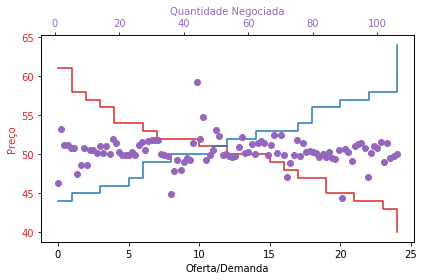

<Figure size 1440x1440 with 0 Axes>

(0, 51.0)


In [5]:
resultados_periodos=esb.iteracoes(mercado_FP,it=20)
preco_e=esb.plot_sim(mercado_FP)
print(preco_e)

306.629417181015


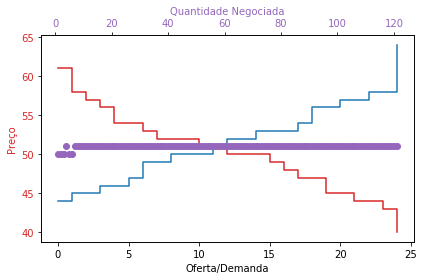

<Figure size 1440x1440 with 0 Axes>

In [6]:
mercado_DP=market_v2.market(lista_agentes[1],per)
resultados_periodos=esb.iteracoes(mercado_DP,it=20)
preco_e=esb.plot_sim(mercado_DP)

5.111301898956299


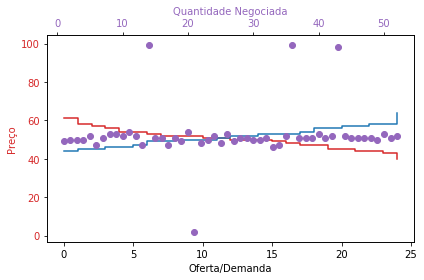

<Figure size 1440x1440 with 0 Axes>

In [7]:
mercado_Q=market_v2.market(lista_agentes[2],per)
resultados_periodos=esb.iteracoes(mercado_Q,it=50)
preco_e=esb.plot_sim(mercado_Q)

7.268560409545898


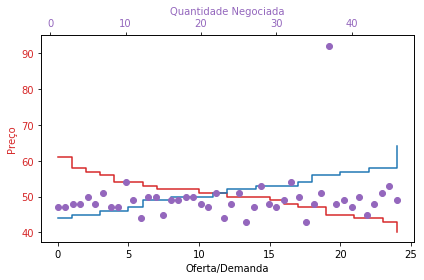

<Figure size 1440x1440 with 0 Axes>

In [8]:
mercado_DQ=market_v2.market(lista_agentes[3],per)
resultados_periodos=esb.iteracoes(mercado_DQ,it=50)
preco_e=esb.plot_sim(mercado_DQ)